In [1]:
# The gussian policy gradient for pendulum continuous model

import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Pendulum-v0')

# REINFORCE algorithm, update distribution parameters after one episode
theta = np.random.random([3])
gamma = 0.99
alpha = 0.001
sigma = 0.1
n_episode = 10000
n_step = 200
steplog = []
reward_sum = []
for episode in range(n_episode):
    slog = []
    alog = []
    rlog = []
    mulog = []
    env.reset()
    action = env.action_space.sample()
    s, r, d, info = env.step(action)
    for step in range(n_step):
        # Gaussian Policy
        mu = np.dot(s, theta)
        # choose action by probability
        action = np.random.normal(mu, sigma, 1)
        s, r, d, info = env.step(action)
        mulog.append(mu)
        slog.append(s)
        alog.append(action)
        rlog.append(r)   
        
        #env.render()
        
        if d:
            break
    reward_sum.append(np.sum(rlog))
    # calculate return v
    v = np.zeros([len(rlog)])
    v[-1] = rlog[-1]
    for i in range(len(rlog)):
        v[-i-1] = rlog[-i-1] + gamma * v[-i]
    # normalize return v
    v -= np.mean(v)
    v /= np.std(v)
        
    # reinforce update parameter theta
    for i in range(len(rlog)):
        dtheta = alpha * (alog[i] - mulog[i]) * slog[i] / sigma**2
        theta += dtheta
    
    steplog.append(step)
    #plt.plot(alog)
    #plt.show()
print 'Training Done!'

[2017-07-10 11:11:55,523] Making new env: Pendulum-v0


Training Done!


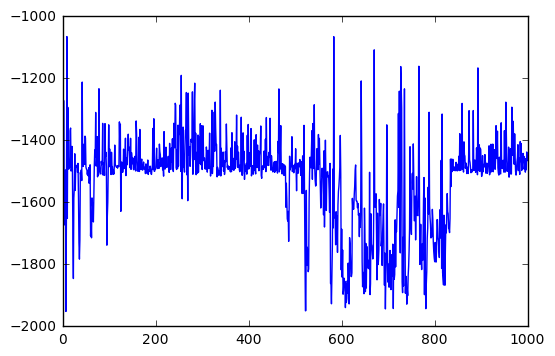

In [17]:
plt.plot(reward_sum)
plt.show()

In [7]:
# test
for episode in range(10):
    env.reset()
    for i in range(1000):
        mu = np.dot(s, theta)
        action = np.random.normal(mu, sigma, 1)
        s, r, d, info = env.step(action)
        env.render()
        if d:
            break

KeyboardInterrupt: 